#One-Class Support Vector Machines
**one-class SVM is not used to perform binary or multiclass classification tasks but to detect outliers or novelties within the dataset.**
The heart of OCSVM lies in its commitment to maximizing the margin between the normal instances and the boundary. A larger margin provides a robust separation, enhancing the model's ability to discern anomalies during testing.
 achieved through a specified kernel function and a nuanced parameter termed "nu." This parameter acts as an upper limit on the fraction of margin errors and support vectors

## credit card anomaly detect (Detecting fraud in financial transactions) using OCSVM

In [ ]:
#load the famous credit card dataset

!pip install kaggle

from google.colab import files
files.upload()

!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

!kaggle datasets download -d mlg-ulb/creditcardfraud

!unzip creditcardfraud.zip

Saving kaggle.json to kaggle.json
Dataset URL: https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud
License(s): DbCL-1.0
 99% 65.0M/66.0M [00:00<00:00, 102MB/s] 
100% 66.0M/66.0M [00:00<00:00, 85.5MB/s]
Archive:  creditcardfraud.zip
  inflating: creditcard.csv          


### Libraries

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.svm import OneClassSVM
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix , accuracy_score


import warnings
warnings.filterwarnings("ignore")

In [ ]:
df = pd.read_csv('creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


### For faster implementation we will use first 50k rows of the dataset.

In [ ]:
df = df.sample( n = 50000 , random_state = 42 )

In [ ]:
# show the number of majority and minority class
print(df['Class'].value_counts())

Class
0    49917
1       83
Name: count, dtype: int64


In [ ]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
43428,41505.0,-16.526507,8.584972,-18.649853,9.505594,-13.793819,-2.832404,-16.701694,7.517344,-8.507059,...,1.190739,-1.127670,-2.358579,0.673461,-1.413700,-0.462762,-2.018575,-1.042804,364.19,1
49906,44261.0,0.339812,-2.743745,-0.134070,-1.385729,-1.451413,1.015887,-0.524379,0.224060,0.899746,...,-0.213436,-0.942525,-0.526819,-1.156992,0.311211,-0.746647,0.040996,0.102038,520.12,0
29474,35484.0,1.399590,-0.590701,0.168619,-1.029950,-0.539806,0.040444,-0.712567,0.002299,-0.971747,...,0.102398,0.168269,-0.166639,-0.810250,0.505083,-0.232340,0.011409,0.004634,31.00,0
276481,167123.0,-0.432071,1.647895,-1.669361,-0.349504,0.785785,-0.630647,0.276990,0.586025,-0.484715,...,0.358932,0.873663,-0.178642,-0.017171,-0.207392,-0.157756,-0.237386,0.001934,1.50,0
278846,168473.0,2.014160,-0.137394,-1.015839,0.327269,-0.182179,-0.956571,0.043241,-0.160746,0.363241,...,-0.238644,-0.616400,0.347045,0.061561,-0.360196,0.174730,-0.078043,-0.070571,0.89,0


In [ ]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50000 entries, 43428 to 274591
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    50000 non-null  float64
 1   V1      50000 non-null  float64
 2   V2      50000 non-null  float64
 3   V3      50000 non-null  float64
 4   V4      50000 non-null  float64
 5   V5      50000 non-null  float64
 6   V6      50000 non-null  float64
 7   V7      50000 non-null  float64
 8   V8      50000 non-null  float64
 9   V9      50000 non-null  float64
 10  V10     50000 non-null  float64
 11  V11     50000 non-null  float64
 12  V12     50000 non-null  float64
 13  V13     50000 non-null  float64
 14  V14     50000 non-null  float64
 15  V15     50000 non-null  float64
 16  V16     50000 non-null  float64
 17  V17     50000 non-null  float64
 18  V18     50000 non-null  float64
 19  V19     50000 non-null  float64
 20  V20     50000 non-null  float64
 21  V21     50000 non-null  float64
 22

In [ ]:
df.isnull().sum()

,0
Time,0
V1,0
V2,0
V3,0
V4,0
V5,0
V6,0
V7,0
V8,0
V9,0


In [ ]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,...,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.00000
mean,94951.926820,-0.002393,0.000194,0.001736,0.002464,0.002483,0.001580,-0.003289,0.000617,-0.002554,...,-0.001626,0.004298,0.000869,0.000401,0.003989,0.001055,0.001618,-0.001650,87.377714,0.00166
std,47485.451927,1.960996,1.631727,1.524856,1.414847,1.352321,1.316629,1.207910,1.212368,1.105842,...,0.736976,0.727218,0.591498,0.607658,0.518084,0.481592,0.407532,0.324956,223.937904,0.04071
min,0.000000,-34.148234,-48.060856,-33.680984,-5.560118,-23.669726,-20.869626,-41.506796,-50.420090,-13.434066,...,-22.889347,-8.887017,-25.356744,-2.824849,-6.035054,-2.068561,-22.565679,-11.710896,0.000000,0.00000
25%,54353.500000,-0.920183,-0.602984,-0.893569,-0.846430,-0.697761,-0.766752,-0.559201,-0.209881,-0.645955,...,-0.228007,-0.541953,-0.164395,-0.354853,-0.313996,-0.325028,-0.070249,-0.052984,5.670000,0.00000
50%,84871.500000,0.019063,0.064134,0.179505,-0.019294,-0.048754,-0.272763,0.036088,0.021590,-0.053654,...,-0.029356,0.011117,-0.013141,0.042477,0.023378,-0.051614,0.001280,0.010598,22.015000,0.00000
75%,139364.750000,1.318402,0.799725,1.034335,0.742609,0.618020,0.407427,0.571469,0.324369,0.592222,...,0.187439,0.533426,0.146412,0.439110,0.350979,0.241456,0.089811,0.077978,77.550000,0.00000
max,172787.000000,2.439207,21.467203,9.382558,12.699542,29.016124,16.493227,21.437514,19.168327,15.594995,...,27.202839,8.361985,22.083545,3.990646,6.070850,3.463246,9.200883,15.942151,5680.000000,1.00000


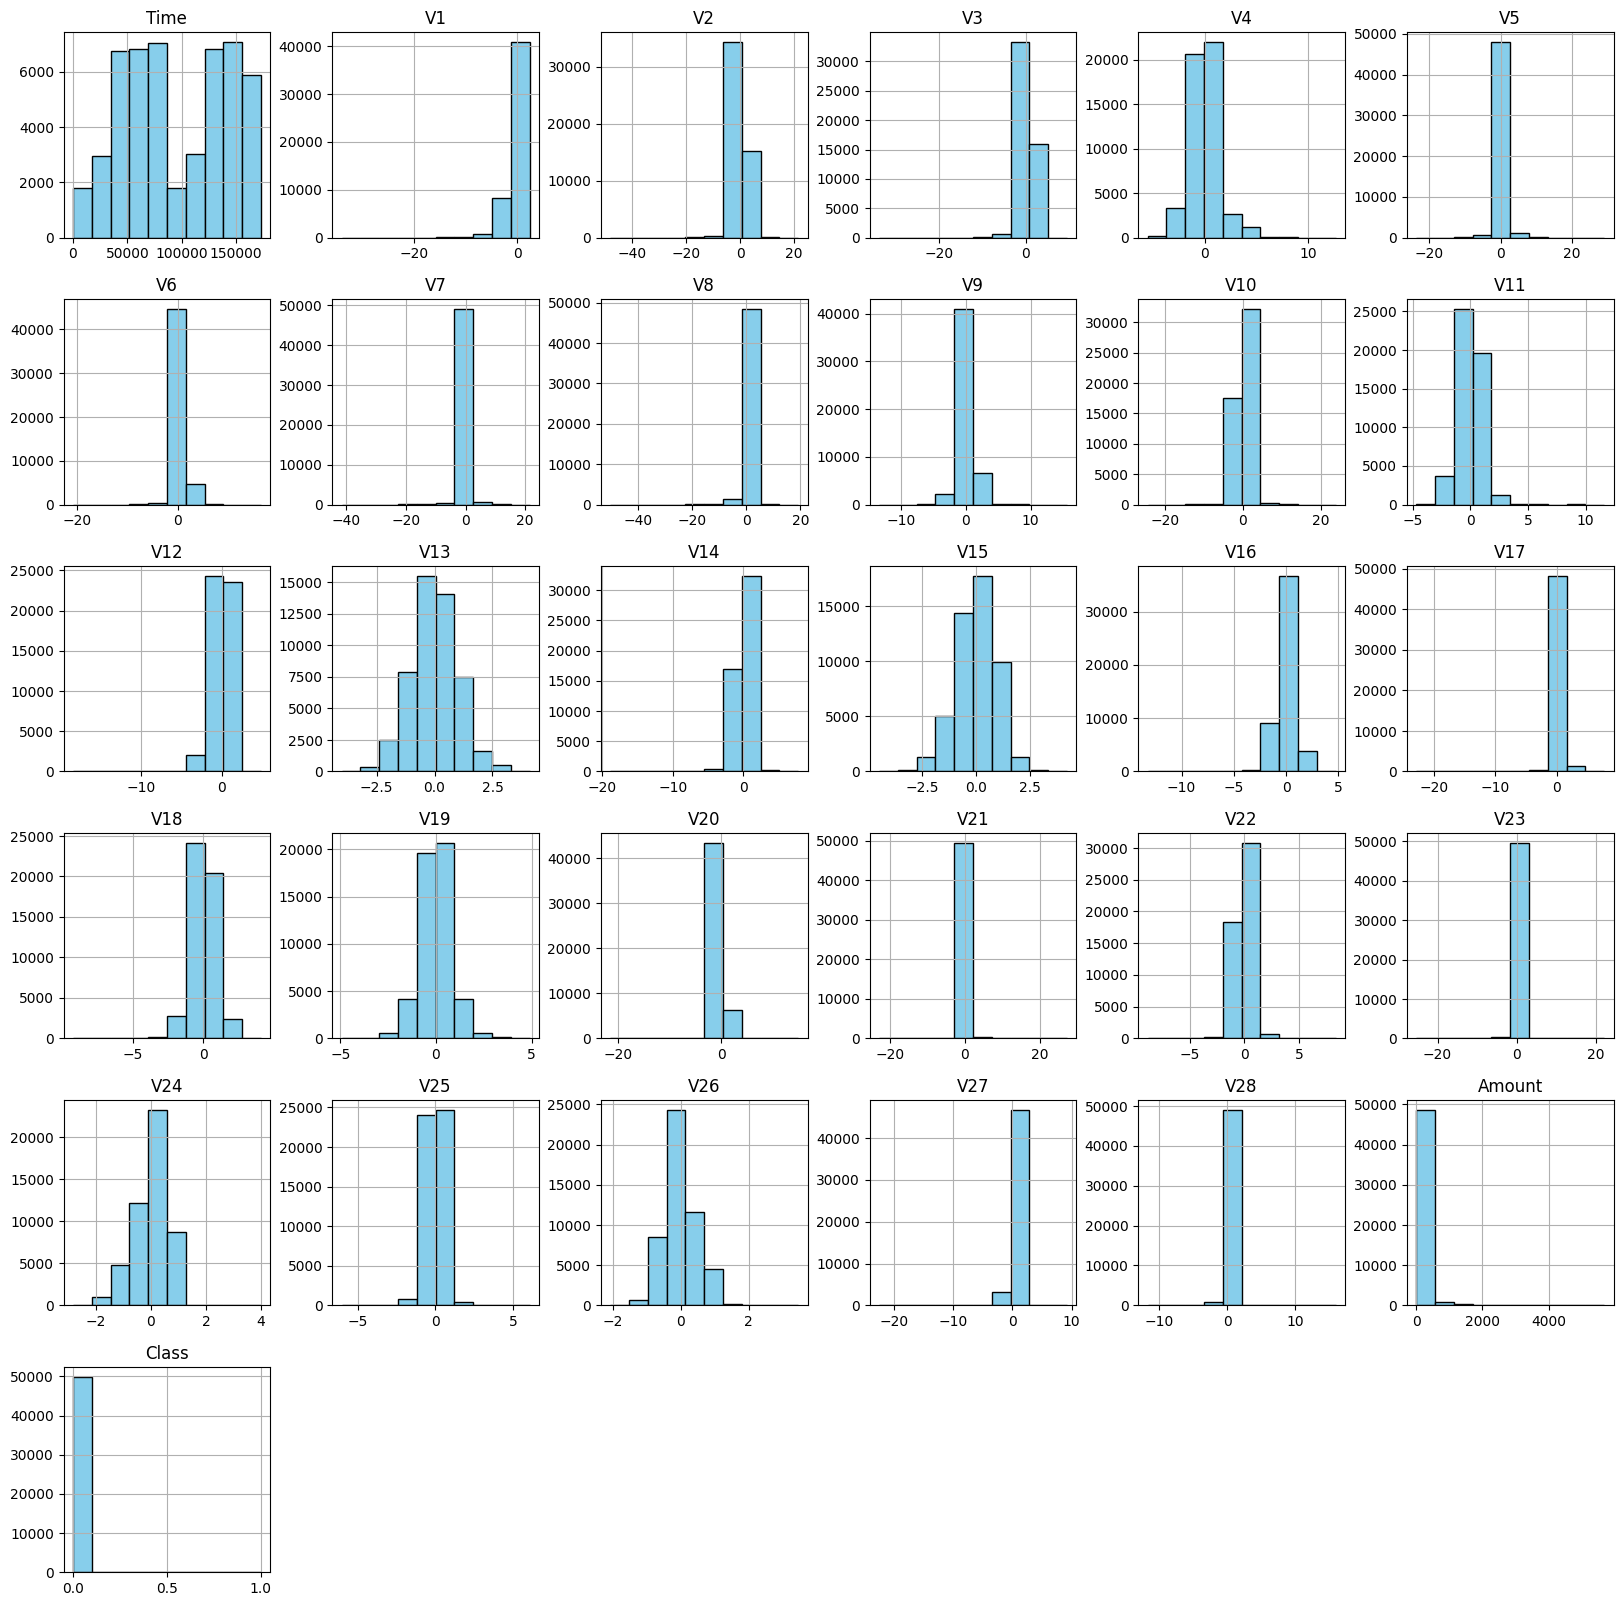

In [ ]:
import matplotlib.pyplot as plt
df.hist(figsize=(20, 20) , color='skyblue', edgecolor='black')
plt.show()

In [ ]:
x = df.drop('Class' , axis = 1)
y = df['Class']

In [ ]:
x

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
43428,41505.0,-16.526507,8.584972,-18.649853,9.505594,-13.793819,-2.832404,-16.701694,7.517344,-8.507059,...,-1.514923,1.190739,-1.127670,-2.358579,0.673461,-1.413700,-0.462762,-2.018575,-1.042804,364.19
49906,44261.0,0.339812,-2.743745,-0.134070,-1.385729,-1.451413,1.015887,-0.524379,0.224060,0.899746,...,0.506044,-0.213436,-0.942525,-0.526819,-1.156992,0.311211,-0.746647,0.040996,0.102038,520.12
29474,35484.0,1.399590,-0.590701,0.168619,-1.029950,-0.539806,0.040444,-0.712567,0.002299,-0.971747,...,0.212877,0.102398,0.168269,-0.166639,-0.810250,0.505083,-0.232340,0.011409,0.004634,31.00
276481,167123.0,-0.432071,1.647895,-1.669361,-0.349504,0.785785,-0.630647,0.276990,0.586025,-0.484715,...,-0.244633,0.358932,0.873663,-0.178642,-0.017171,-0.207392,-0.157756,-0.237386,0.001934,1.50
278846,168473.0,2.014160,-0.137394,-1.015839,0.327269,-0.182179,-0.956571,0.043241,-0.160746,0.363241,...,-0.255293,-0.238644,-0.616400,0.347045,0.061561,-0.360196,0.174730,-0.078043,-0.070571,0.89
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106498,69990.0,0.462363,-1.550233,0.874507,1.595693,-0.819377,2.172600,-0.812574,0.619746,1.529879,...,0.509357,0.119895,0.102082,-0.530930,-1.251226,0.504400,-0.164403,0.056260,0.068515,338.00
283717,171815.0,1.972563,-0.000713,-1.954494,0.409805,0.402250,-0.818861,0.181189,-0.091878,0.313003,...,-0.175135,-0.211346,-0.656463,0.245418,0.637921,-0.203497,0.271014,-0.089187,-0.038181,32.04
14468,25632.0,-0.788040,-0.327733,1.747076,-2.612266,-0.155487,0.060404,0.287468,-0.133078,1.475529,...,-0.019170,0.280058,1.146401,-0.293311,-0.675839,-0.327425,-0.000669,-0.036724,-0.113928,105.92
283271,171486.0,-0.741114,0.585081,0.978985,-0.424461,1.555087,1.236085,0.510679,0.429463,-0.915042,...,0.063084,-0.172254,-0.443694,-0.253624,-1.615967,0.192874,0.614091,0.025788,0.029221,0.99


In [ ]:
y

,Class
43428,1
49906,0
29474,0
276481,0
278846,0
...,...
106498,0
283717,0
14468,0
283271,0


In [ ]:
scaler = MinMaxScaler()
x = scaler.fit_transform(x)
x

array([[2.40209044e-01, 4.81633220e-01, 8.14718958e-01, ...,
        6.46815483e-01, 3.85783585e-01, 6.41179577e-02],
       [2.56159318e-01, 9.42619780e-01, 6.51781618e-01, ...,
        7.11650043e-01, 4.27183797e-01, 9.15704225e-02],
       [2.05362672e-01, 9.71585408e-01, 6.82748165e-01, ...,
        7.10718650e-01, 4.23661448e-01, 5.45774648e-03],
       ...,
       [1.48344494e-01, 9.11793561e-01, 6.86530361e-01, ...,
        7.09203458e-01, 4.19373967e-01, 1.86478873e-02],
       [9.92470498e-01, 9.13076136e-01, 6.99659072e-01, ...,
        7.11171292e-01, 4.24550566e-01, 1.74295775e-04],
       [9.61310747e-01, 9.14328897e-01, 6.95973512e-01, ...,
        6.98586703e-01, 4.31371858e-01, 4.39964789e-03]])

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x ,  y, test_size=0.2, random_state=42)


In [ ]:
'''This kernel is suitable for capturing complex, non-linear relationships in the data.
a larger gamma value leads to a more complex decision boundary
A smaller nu value makes the algorithm more lenient, permitting a higher fraction of margin errors and support vectors,
which can be useful in scenarios with a considerable number of anomalies.
'''

clf_svm = OneClassSVM(kernel= 'rbf', degree=3, gamma=0.1, nu=0.01)
clf_svm.fit(x_train)

OneClassSVM(gamma=0.1, nu=0.01)

In [ ]:
y_pred = clf_svm.predict(x_test)
y_pred[:5]

array([1, 1, 1, 1, 1])

In [ ]:
y_pred = pd.Series(y_pred).replace([-1,1],[1,0])

In [ ]:
accuracy = accuracy_score(y_pred, y_test)
print('Accuracy in separating Outlier : ', accuracy)


Accuracy in separating Outlier :  0.9905


In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00      9992
           1       0.04      0.50      0.08         8

    accuracy                           0.99     10000
   macro avg       0.52      0.75      0.54     10000
weighted avg       1.00      0.99      0.99     10000



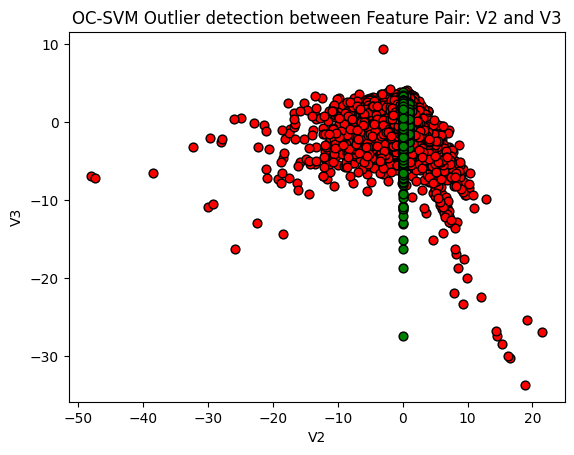

In [ ]:
def plot_OCSVM(i):
    # Scatter plot for the original data
    plt.scatter(df.iloc[:, i], df.iloc[:, i + 1], c='red', s=40, edgecolor='k')

    # Access y_pred as a 1D array using values and reshape it for plotting
    plt.scatter(y_pred.values, df.iloc[y_pred.index, i + 1], c='green', s=40, edgecolor='k')

    plt.title('OC-SVM Outlier detection between Feature Pair: V{} and V{}'.format(i, i + 1))
    plt.xlabel('V{}'.format(i))
    plt.ylabel('V{}'.format(i + 1))

# Example usage:
plot_OCSVM(2)

In [ ]:
from sklearn import svm

clf = svm.SVC(kernel = 'linear')
clf.fit(x_train , y_train)
y_pred = clf.predict(x_test)

In [ ]:
print(f'score Training: {clf.score(x_train,y_train)}')

print(f'score Testing: {clf.score(x_test,y_test)}')

score Training: 0.999225
score Testing: 0.9998


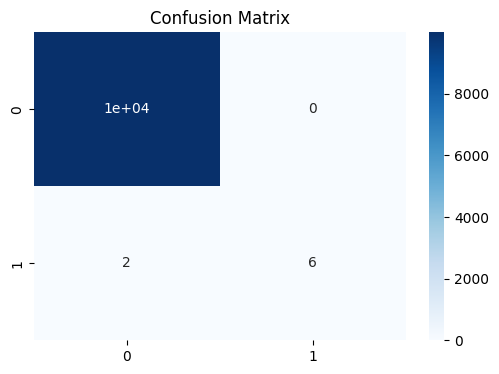

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      9992
           1       1.00      0.75      0.86         8

    accuracy                           1.00     10000
   macro avg       1.00      0.88      0.93     10000
weighted avg       1.00      1.00      1.00     10000



In [ ]:
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

print(classification_report(y_test,y_pred))